In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
!pip install -U scikit-learn imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

sns.set_style('darkgrid')

In [2]:
DATA_DIR = "/kaggle/input/new-data/"

In [3]:
from glob import glob

image_paths = []

extensions = ['**/*.jpg', '**/*.JPG', '**/*.png', '**/*.jpeg']

for ext in extensions:
    image_paths.extend(glob(os.path.join(DATA_DIR, ext), recursive=True))

print("Found:", len(image_paths))

Found: 5703


In [4]:
data = []
for path in tqdm(image_paths):
    try:
        label = os.path.basename(os.path.dirname(path))
        data.append({'image_path': path, 'label': label})
    except Exception as e:
        print(f"Error processing {path}: {e}")

df = pd.DataFrame(data)

print("\nDataFrame Head:")
print(df.head())

print(f"\nSample Path: {df['image_path'].iloc[0]}")
print(f"Sample Label: {df['label'].iloc[0]}")

  0%|          | 0/5703 [00:00<?, ?it/s]


DataFrame Head:
                                          image_path           label
0  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
1  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
2  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
3  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K
4  /kaggle/input/new-data/Bitter gourd/Bitter_gou...  Bitter_gourd_K

Sample Path: /kaggle/input/new-data/Bitter gourd/Bitter_gourd_K/bitter_gourd__K-42-_JPG_jpg.rf.422423552394956736ace77137f06150.jpg
Sample Label: Bitter_gourd_K


In [5]:
import os
import pandas as pd
from glob import glob
from tqdm.auto import tqdm

OLID_DIR = "/kaggle/input/olid-i/"

olid_paths = []
extensions = ['**/*.jpg', '**/*.JPG', '**/*.png', '**/*.jpeg']

for ext in extensions:
    olid_paths.extend(glob(os.path.join(OLID_DIR, ext), recursive=True))

print(f"Found {len(olid_paths)} OLID images.")

olid_data = []
for path in tqdm(olid_paths, desc="Processing OLID"):
    try:
        label = os.path.basename(os.path.dirname(path))
        olid_data.append({'image_path': path, 'label': label})
    except Exception as e:
        print(f"Error processing {path}: {e}")

df_olid = pd.DataFrame(olid_data)

df_combined = pd.concat([df, df_olid], ignore_index=True)

print("\n--- Merge Complete ---")
print(f"New Data count: {len(df)}")
print(f"OLID Data count: {len(df_olid)}")
print(f"Total Combined count: {len(df_combined)}")

print("\nSample Rows:")
print(df_combined.sample(5))


Found 4749 OLID images.


Processing OLID:   0%|          | 0/4749 [00:00<?, ?it/s]


--- Merge Complete ---
New Data count: 5703
OLID Data count: 4749
Total Combined count: 10452

Sample Rows:
                                             image_path                 label
9826  /kaggle/input/olid-i/eggplant__K/eggplant__K (...           eggplant__K
5273  /kaggle/input/new-data/Bottel Gourd/Bottel_gou...  Bottel_gourd_healthy
4753  /kaggle/input/new-data/Bottel Gourd/Bottel_gou...       Bottel_gourd_DM
8281  /kaggle/input/olid-i/bottle_gourd__K/bottle_go...       bottle_gourd__K
2286  /kaggle/input/new-data/Cucumber/Cucumber_PM/IM...           Cucumber_PM


In [6]:
df = df_combined


--- Dataset Analysis ---
Total number of images: 10452
Total number of classes: 69

Class Distribution (Value Counts):
label
Cucumber_Healthy         1235
Cucumber_PM              1191
Bottel_gourd_DM           695
Tomato_Healthy            601
Bottel_gourd_healthy      521
                         ... 
bottle_gourd__JAS_MIT      29
bottle_gourd__DM           28
bottle_gourd__LS           28
ridge_gourd__PLEI_MIT      25
bottle_gourd__JAS          24
Name: count, Length: 69, dtype: int64


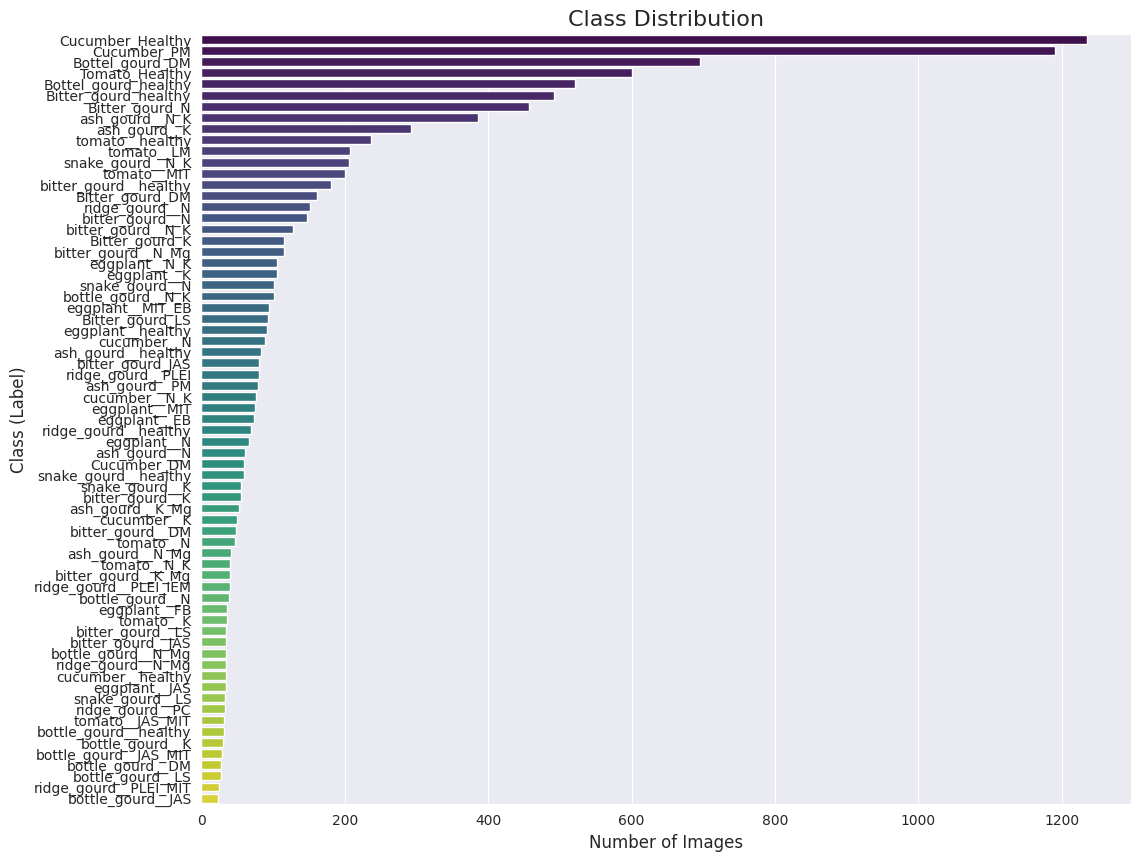

In [7]:
print("\n--- Dataset Analysis ---")
print(f"Total number of images: {len(df)}")
num_classes = df['label'].nunique()
print(f"Total number of classes: {num_classes}")

print("\nClass Distribution (Value Counts):")
print(df['label'].value_counts())

plt.figure(figsize=(12, 10))
sns.countplot(y='label', data=df, order=df['label'].value_counts().index, palette='viridis')
plt.title('Class Distribution', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()

In [8]:
new_dataset_labels = set(df['label'].unique())
olid_dataset_labels = set(df_olid['label'].unique())

unique_new_labels = new_dataset_labels - olid_dataset_labels

print(f"Found {len(unique_new_labels)} labels in the new dataset that don't match OLID:")
print("------------------------------------------------")
for label in sorted(list(unique_new_labels)):
    print(label)

Found 12 labels in the new dataset that don't match OLID:
------------------------------------------------
Bitter_gourd_DM
Bitter_gourd_K
Bitter_gourd_LS
Bitter_gourd_N
Bitter_gourd_healthy
Bottel_gourd_DM
Bottel_gourd_healthy
Cucumber_DM
Cucumber_Healthy
Cucumber_PM
Tomato_Healthy
bitter_gourd_JAS


In [9]:
df_combined = df_combined[~df_combined['label'].isin(['Cucumber_DM', 'Cucumber_PM', 'cucumber__DM', 'cucumber__PM'])].copy()

In [10]:
label_corrections = {
    'Bitter_gourd_DM':      'bitter_gourd__DM',
    'Bitter_gourd_K':       'bitter_gourd__K',
    'Bitter_gourd_LS':      'bitter_gourd__LS',
    'Bitter_gourd_N':       'bitter_gourd__N',
    'Bitter_gourd_healthy': 'bitter_gourd__healthy',
    'Tomato_Healthy':       'tomato__healthy',
    'Cucumber_Healthy':     'cucumber__healthy',
    
    'Bottel_gourd_DM':      'bottle_gourd__DM',
    'Bottel_gourd_healthy': 'bottle_gourd__healthy',

    'bitter_gourd_JAS':     'bitter_gourd__JAS',

    'Cucumber_DM':          'cucumber__DM',
    'Cucumber_PM':          'cucumber__PM'
}

print("--- Fixing Labels ---")
print(f"Unique classes before fix: {df_combined['label'].nunique()}")

df_combined['label'] = df_combined['label'].replace(label_corrections)

print(f"Unique classes after fix: {df_combined['label'].nunique()}")

print("\nTop 10 classes now:")
print(df_combined['label'].value_counts().head(10))

--- Fixing Labels ---
Unique classes before fix: 67
Unique classes after fix: 57

Top 10 classes now:
label
cucumber__healthy        1269
tomato__healthy           837
bottle_gourd__DM          723
bitter_gourd__healthy     673
bitter_gourd__N           604
bottle_gourd__healthy     552
ash_gourd__N_K            386
ash_gourd__K              293
bitter_gourd__DM          209
tomato__LM                207
Name: count, dtype: int64


In [11]:
df = df_combined


--- Single Image Inspection ---
Successfully read image: /kaggle/input/new-data/Bitter gourd/Bitter_gourd_K/bitter_gourd__K-8-_JPG_jpg.rf.b3f406c9950f1a5336650538d3584e18.jpg
Image shape: (640, 640, 3)


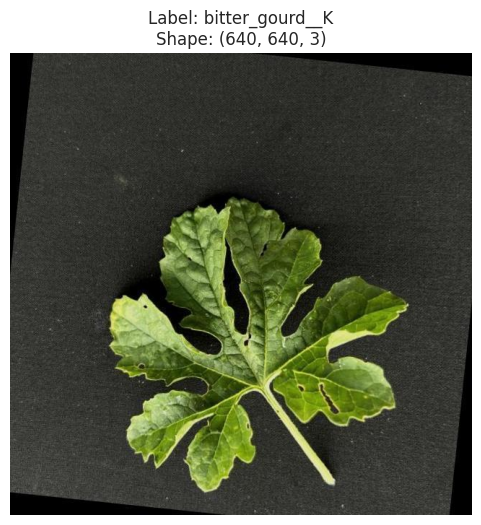


--- Grid of Sample Images ---


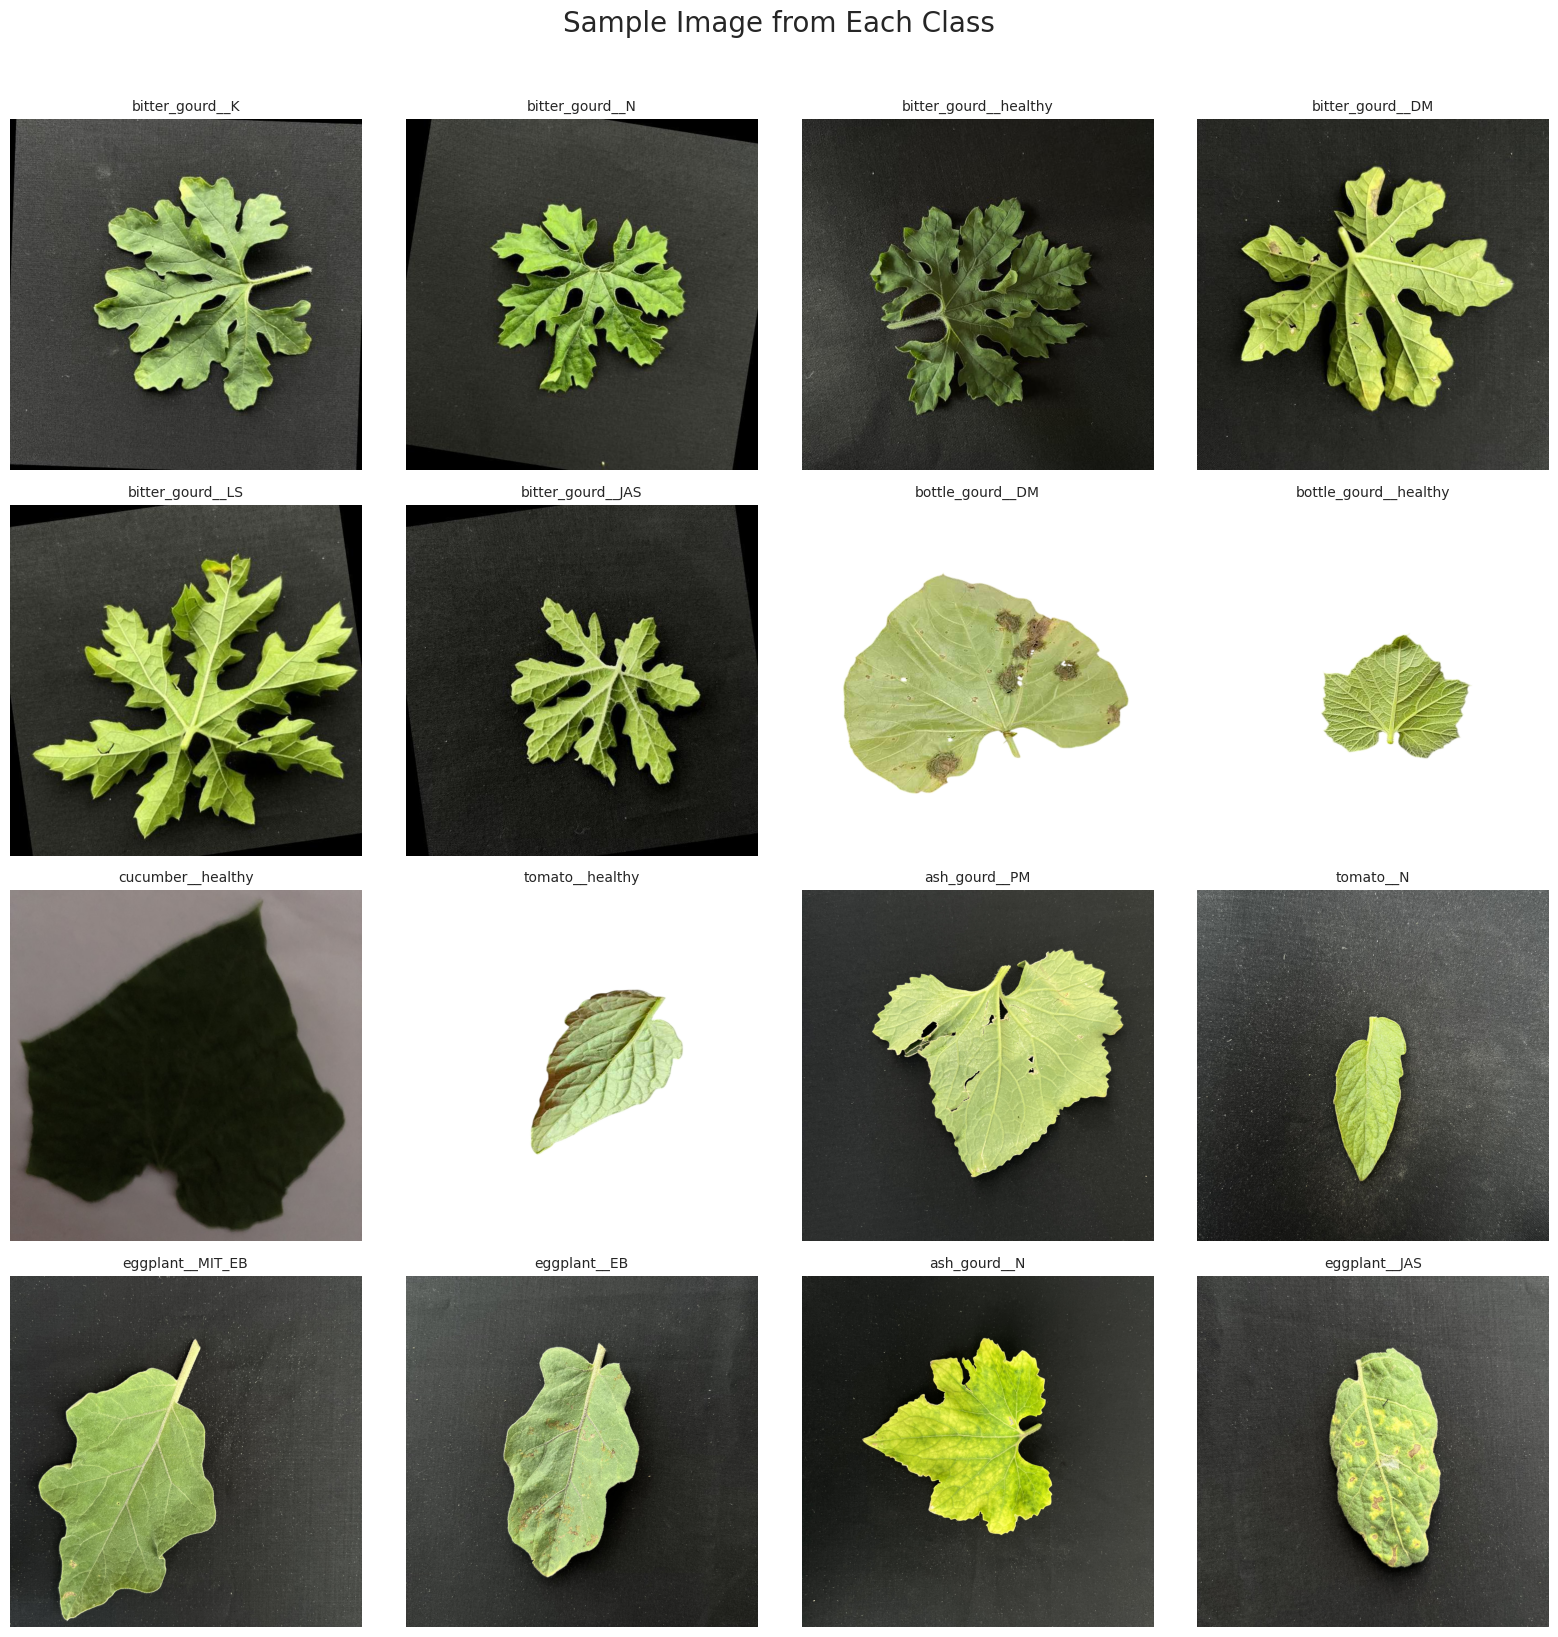

In [12]:
print("\n--- Single Image Inspection ---")
sample_row = df.iloc[5]
sample_path = sample_row['image_path']
sample_label = sample_row['label']

image_bgr = cv2.imread(sample_path)

if image_bgr is not None:
    print(f"Successfully read image: {sample_path}")
    
    print(f"Image shape: {image_bgr.shape}")

    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.title(f"Label: {sample_label}\nShape: {image_bgr.shape}")
    plt.axis('off')
    plt.show()

else:
    print(f"Error: Could not read image at {sample_path}")

print("\n--- Grid of Sample Images ---")
unique_labels = df['label'].unique()

grid_size = min(num_classes, 16) 
cols = 4
rows = int(np.ceil(grid_size / cols))

plt.figure(figsize=(cols * 4, rows * 4))
for i, label in enumerate(unique_labels[:grid_size]):
    path = df[df['label'] == label].sample(1)['image_path'].values[0]
    
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_rgb)
    plt.title(label, fontsize=10)
    plt.axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [13]:
df[['plant_type', 'status']] = df['label'].str.split('__', n=1, expand=True)

print("--- Before Filtering ---")
print(f"Original number of images: {len(df)}")
print(f"Original number of classes: {df['label'].nunique()}")

df_filtered = df[~df['status'].str.contains('_')].copy()

print("\n--- After Filtering ---")
print(f"Dropped {len(df) - len(df_filtered)} images with composite labels.")
print(f"New total number of images: {len(df_filtered)}")
print(f"New total number of classes: {df_filtered['label'].nunique()}")

dropped_labels = set(df['label']) - set(df_filtered['label'])
print(f"\nExample labels that were dropped:\n{list(dropped_labels)[:5]}")

--- Before Filtering ---
Original number of images: 9201
Original number of classes: 57

--- After Filtering ---
Dropped 1584 images with composite labels.
New total number of images: 7617
New total number of classes: 39

Example labels that were dropped:
['bottle_gourd__N_Mg', 'tomato__JAS_MIT', 'ash_gourd__K_Mg', 'bottle_gourd__N_K', 'snake_gourd__N_K']


In [14]:
df_filtered["label"].unique()

array(['bitter_gourd__K', 'bitter_gourd__N', 'bitter_gourd__healthy',
       'bitter_gourd__DM', 'bitter_gourd__LS', 'bitter_gourd__JAS',
       'bottle_gourd__DM', 'bottle_gourd__healthy', 'cucumber__healthy',
       'tomato__healthy', 'ash_gourd__PM', 'tomato__N', 'eggplant__EB',
       'ash_gourd__N', 'eggplant__JAS', 'ridge_gourd__PC',
       'eggplant__MIT', 'ridge_gourd__N', 'snake_gourd__LS',
       'eggplant__FB', 'ridge_gourd__healthy', 'bottle_gourd__JAS',
       'snake_gourd__N', 'ash_gourd__healthy', 'snake_gourd__healthy',
       'cucumber__K', 'cucumber__N', 'ash_gourd__K', 'bottle_gourd__K',
       'bottle_gourd__LS', 'tomato__K', 'snake_gourd__K', 'tomato__LM',
       'ridge_gourd__PLEI', 'bottle_gourd__N', 'eggplant__K',
       'tomato__MIT', 'eggplant__N', 'eggplant__healthy'], dtype=object)


--- New Class Distribution ---
label
cucumber__healthy        1269
tomato__healthy           837
bottle_gourd__DM          723
bitter_gourd__healthy     673
bitter_gourd__N           604
bottle_gourd__healthy     552
ash_gourd__K              293
bitter_gourd__DM          209
tomato__LM                207
tomato__MIT               200
bitter_gourd__K           171
ridge_gourd__N            152
bitter_gourd__LS          128
bitter_gourd__JAS         116
eggplant__K               106
snake_gourd__N            102
eggplant__healthy          92
cucumber__N                89
ash_gourd__healthy         83
ridge_gourd__PLEI          80
ash_gourd__PM              79
eggplant__MIT              75
eggplant__EB               74
ridge_gourd__healthy       70
eggplant__N                67
ash_gourd__N               61
snake_gourd__healthy       59
snake_gourd__K             56
cucumber__K                50
tomato__N                  47
bottle_gourd__N            39
eggplant__FB               36
to

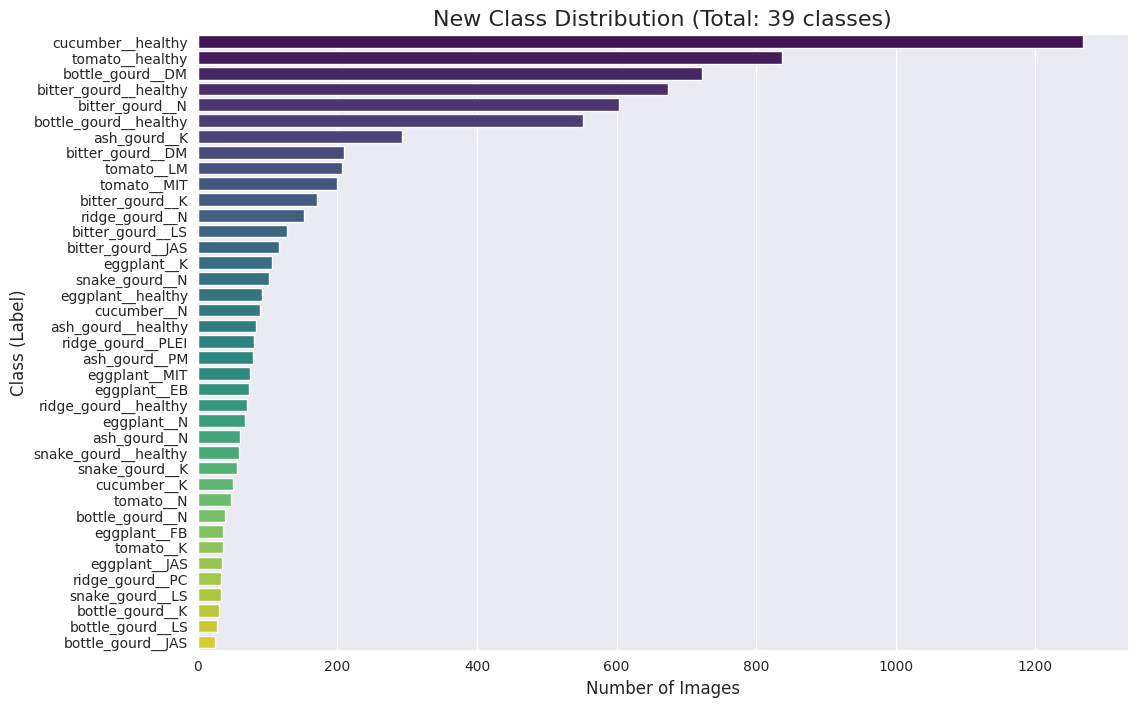

In [15]:
print("\n--- New Class Distribution ---")
print(df_filtered['label'].value_counts())

plt.figure(figsize=(12, 8))
num_new_classes = df_filtered['label'].nunique()
sns.countplot(
    y='label', 
    data=df_filtered, 
    order=df_filtered['label'].value_counts().index, 
    palette='viridis'
)
plt.title(f'New Class Distribution (Total: {num_new_classes} classes)', fontsize=16)
plt.xlabel('Number of Images', fontsize=12)
plt.ylabel('Class (Label)', fontsize=12)
plt.show()

In [16]:
from skimage.feature import graycomatrix, graycoprops, local_binary_pattern, hog
from skimage.color import rgb2gray
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

tqdm.pandas(desc="Processing Images")

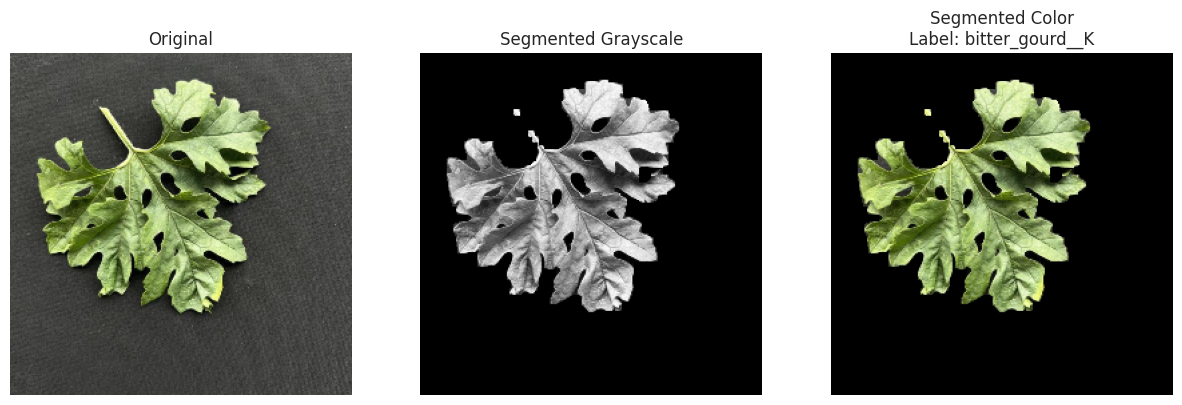

In [17]:
IMG_SIZE = 256 

def preprocess_and_segment(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        lower_green = np.array([25, 40, 40])
        upper_green = np.array([85, 255, 255]) 
        
        mask = cv2.inRange(hsv_img, lower_green, upper_green)

        kernel = np.ones((3, 3), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
        
        segmented_color = cv2.bitwise_and(img, img, mask=mask)

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        segmented_gray = cv2.bitwise_and(gray_img, gray_img, mask=mask)
        
        return segmented_color, segmented_gray

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.zeros((IMG_SIZE, IMG_SIZE, 3), dtype=np.uint8), \
               np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)

sample_path = df_filtered['image_path'].iloc[0]
sample_label = df_filtered['label'].iloc[0]

segmented_color, segmented_gray = preprocess_and_segment(sample_path)

original_img = cv2.imread(sample_path)
original_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE))

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(segmented_gray, cmap='gray')
axes[1].set_title("Segmented Grayscale")
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(segmented_color, cv2.COLOR_BGR2RGB))
axes[2].set_title(f"Segmented Color\nLabel: {sample_label}")
axes[2].axis('off')

plt.show()

In [18]:
def extract_color_features(segmented_color):
    """Calculates a 3D HSV color histogram."""
    hsv = cv2.cvtColor(segmented_color, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 12, 3], [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

def extract_texture_features(segmented_gray):
    """Calculates GLCM and LBP texture features."""
    glcm = graycomatrix(segmented_gray, 
                        distances=[5], 
                        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], 
                        levels=256,
                        symmetric=True, 
                        normed=True)
    
    contrast = graycoprops(glcm, 'contrast').flatten()
    dissimilarity = graycoprops(glcm, 'dissimilarity').flatten()
    homogeneity = graycoprops(glcm, 'homogeneity').flatten()
    energy = graycoprops(glcm, 'energy').flatten()
    correlation = graycoprops(glcm, 'correlation').flatten()
    
    glcm_features = np.hstack([contrast, dissimilarity, homogeneity, energy, correlation])
    
    n_points = 24 
    radius = 8
    lbp = local_binary_pattern(segmented_gray, n_points, radius, method='uniform')
    
    (lbp_hist, _) = np.histogram(lbp.ravel(),
                                 bins=np.arange(0, n_points + 3),
                                 range=(0, n_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)
    
    return np.hstack([glcm_features, lbp_hist])

def extract_shape_features(segmented_gray):
    """Calculates Histogram of Oriented Gradients (HOG) features."""
    hog_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(16, 16),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)
    return hog_features

In [19]:
def create_feature_vector(image_path):
    segmented_color, segmented_gray = preprocess_and_segment(image_path)
    
    if np.max(segmented_color) == 0:
        print(f"Segmentation failed for {image_path}. Skipping.")
        return np.zeros(2098) 

    color_features = extract_color_features(segmented_color)
    
    texture_features = extract_texture_features(segmented_gray)
    
    shape_features = hog(segmented_gray, 
                       orientations=9, 
                       pixels_per_cell=(32, 32),
                       cells_per_block=(2, 2), 
                       transform_sqrt=True, 
                       block_norm='L2-Hys',
                       feature_vector=True)

    return np.hstack([color_features, texture_features, shape_features])

In [30]:
df_filtered['features'] = df_filtered['image_path'].progress_apply(create_feature_vector)

plant_encoder = LabelEncoder()
df_filtered['plant_type_encoded'] = plant_encoder.fit_transform(df_filtered['plant_type'])

X_images = np.stack(df_filtered['features'].values)

X_plant_type = df_filtered['plant_type_encoded'].values.reshape(-1, 1) 

X = np.hstack([X_images, X_plant_type])

y_labels = df_filtered['label']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_labels)

print("\n--- Dataset Build Complete ---")
print(f"X (feature matrix) shape: {X.shape}")
print(f"y (target vector) shape: {y.shape}")
print(f"\nNumber of features per image: {X_images.shape[1]}")
print(f"Number of 'plant_type' features: {X_plant_type.shape[1]}")
print(f"Total features: {X.shape[1]}")
df_filtered.to_csv('/kaggle/working/output.csv', index=False)
np.save('/kaggle/working/X_matrix.npy', X)

print("\nSaved Label Encoder classes:")
print(label_encoder.classes_)

Processing Images:   0%|          | 0/7617 [00:00<?, ?it/s]

Segmentation failed for /kaggle/input/new-data/Cucumber/Cucumber_Healthy/IMG_6249.JPG. Skipping.
Segmentation failed for /kaggle/input/new-data/Cucumber/Cucumber_Healthy/IMG_6240.JPG. Skipping.

--- Dataset Build Complete ---
X (feature matrix) shape: (7617, 2099)
y (target vector) shape: (7617,)

Number of features per image: 2098
Number of 'plant_type' features: 1
Total features: 2099

Saved Label Encoder classes:
['ash_gourd__K' 'ash_gourd__N' 'ash_gourd__PM' 'ash_gourd__healthy'
 'bitter_gourd__DM' 'bitter_gourd__JAS' 'bitter_gourd__K'
 'bitter_gourd__LS' 'bitter_gourd__N' 'bitter_gourd__healthy'
 'bottle_gourd__DM' 'bottle_gourd__JAS' 'bottle_gourd__K'
 'bottle_gourd__LS' 'bottle_gourd__N' 'bottle_gourd__healthy'
 'cucumber__K' 'cucumber__N' 'cucumber__healthy' 'eggplant__EB'
 'eggplant__FB' 'eggplant__JAS' 'eggplant__K' 'eggplant__MIT'
 'eggplant__N' 'eggplant__healthy' 'ridge_gourd__N' 'ridge_gourd__PC'
 'ridge_gourd__PLEI' 'ridge_gourd__healthy' 'snake_gourd__K'
 'snake_gourd__

In [31]:
import numpy as np

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

feature_sums = np.sum(np.abs(X[:, :-1]), axis=1)
valid_mask = feature_sums > 0

X = X[valid_mask]
y = y[valid_mask]

df_filtered = df_filtered.iloc[valid_mask].reset_index(drop=True)

print(f"\nDropped {np.sum(~valid_mask)} failed rows.")
print(f"Cleaned X shape: {X.shape}")
print(f"Cleaned y shape: {y.shape}")

np.save('/kaggle/working/X_matrix_clean.npy', X)
df_filtered.to_csv('/kaggle/working/output_clean.csv', index=False)

Original X shape: (7617, 2099)
Original y shape: (7617,)

Dropped 2 failed rows.
Cleaned X shape: (7615, 2099)
Cleaned y shape: (7615,)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

print("\n--- 2. Splitting, Scaling, and PCA ---")

X_train, X_test, y_train_multi, y_test_multi = train_test_split(
    X_resampled, y_multi_final,
    test_size=0.25,
    random_state=42,
    stratify=y_plant_final 
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=464, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Train PCA Shape: {X_train_pca.shape}")
print(f"Test PCA Shape:  {X_test_pca.shape}")


--- 2. Splitting, Scaling, and PCA ---
Train PCA Shape: (37059, 464)
Test PCA Shape:  (12354, 464)


In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

print("--- 1. Splitting Data (BEFORE SMOTE) ---")

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y 
)

print(f"Original X_train shape: {X_train_raw.shape}")
print(f"Original X_test shape:  {X_test_raw.shape}")

print("\n--- 2. Applying SMOTE (Only to Training Data) ---")

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_raw, y_train_raw)

print(f"Resampled X_train shape: {X_train_res.shape} (Balanced)")
print(f"X_test shape remains:    {X_test_raw.shape} (Untouched/Real)")

print("\n--- 3. Preparing Multi-Output Targets ---")

y_all_strings = label_encoder.inverse_transform(y)
df_all_temp = pd.DataFrame({'label': y_all_strings})
df_all_temp[['plant', 'status']] = df_all_temp['label'].str.split('__', n=1, expand=True)

plant_encoder_multi = LabelEncoder()
plant_encoder_multi.fit(df_all_temp['plant'])

status_encoder_multi = LabelEncoder()
status_encoder_multi.fit(df_all_temp['status'])

def get_multi_target(y_encoded_input):
    strings = label_encoder.inverse_transform(y_encoded_input)
    df_temp = pd.DataFrame({'label': strings})
    df_temp[['plant', 'status']] = df_temp['label'].str.split('__', n=1, expand=True)
    y_p = plant_encoder_multi.transform(df_temp['plant'])
    y_s = status_encoder_multi.transform(df_temp['status'])
    return np.stack([y_p, y_s], axis=1)

y_train_multi = get_multi_target(y_train_res)
y_test_multi  = get_multi_target(y_test_raw)

print(f"y_train_multi shape: {y_train_multi.shape}")
print(f"y_test_multi shape:  {y_test_multi.shape}")

print("\n--- 4. Scaling and PCA ---")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled  = scaler.transform(X_test_raw)

pca = PCA(n_components=464, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print(f"Train PCA Shape: {X_train_pca.shape}")
print(f"Test PCA Shape:  {X_test_pca.shape}")


--- 1. Splitting Data (BEFORE SMOTE) ---
Original X_train shape: (5711, 2099)
Original X_test shape:  (1904, 2099)

--- 2. Applying SMOTE (Only to Training Data) ---
Resampled X_train shape: (37050, 2099) (Balanced)
X_test shape remains:    (1904, 2099) (Untouched/Real)

--- 3. Preparing Multi-Output Targets ---
y_train_multi shape: (37050, 2)
y_test_multi shape:  (1904, 2)

--- 4. Scaling and PCA ---
Train PCA Shape: (37050, 464)
Test PCA Shape:  (1904, 464)


In [ ]:
def evaluate_multi_output(y_true, y_pred, model_name):
    print(f"\n--- EVALUATION: {model_name} ---")
    
    y_true_plant = y_true[:, 0]
    y_true_status = y_true[:, 1]
    
    y_pred_plant = y_pred[:, 0]
    y_pred_status = y_pred[:, 1]
    
    print("\n--- Target 1: Plant Type ---")
    print(f"Accuracy: {accuracy_score(y_true_plant, y_pred_plant):.4f}")
    print(classification_report(
        y_true_plant, 
        y_pred_plant, 
        target_names=plant_encoder_multi.classes_
    ))
    
    print("\n--- Target 2: Status (Disease/Deficiency) ---")
    print(f"Accuracy: {accuracy_score(y_true_status, y_pred_status):.4f}")
    print(f"Macro F1 (most important): {f1_score(y_true_status, y_pred_status, average='macro'):.4f}")
    print(classification_report(
        y_true_status, 
        y_pred_status, 
        target_names=status_encoder_multi.classes_,
        zero_division=0 
    ))

print("\nSetup complete. You are ready to train models.")

# AUTO Encoder

In [33]:
import numpy as np
import cv2
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

IMG_SIZE_AE = 128 

def load_pixel_data(df):
    """
    Loads images, segments them, resizes to 128x128, and normalizes to 0-1.
    Returns a numpy array of shape (N, 128, 128, 3)
    """
    pixel_data = []
    
    for path in tqdm(df['image_path'], desc="Loading & Segmenting Images"):
        try:
            img = cv2.imread(path)
            img = cv2.resize(img, (IMG_SIZE_AE, IMG_SIZE_AE))
            
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            lower_green = np.array([25, 40, 40])
            upper_green = np.array([85, 255, 255])
            mask = cv2.inRange(hsv, lower_green, upper_green)
            segmented = cv2.bitwise_and(img, img, mask=mask)
            
            segmented = segmented.astype('float32') / 255.0
            
            pixel_data.append(segmented)
            
        except Exception as e:
            print(f"Error: {e}")
            pixel_data.append(np.zeros((IMG_SIZE_AE, IMG_SIZE_AE, 3)))

    return np.array(pixel_data)

print("Loading pixel data for AutoEncoder...")
X_pixels = load_pixel_data(df_filtered)

print(f"Pixel Data Shape: {X_pixels.shape}")

Loading pixel data for AutoEncoder...


Loading & Segmenting Images:   0%|          | 0/7615 [00:00<?, ?it/s]

Pixel Data Shape: (7615, 128, 128, 3)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x) 
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    encoded = layers.GlobalAveragePooling2D()(x)

    x = layers.Reshape((1, 1, 128))(encoded)
    x = layers.UpSampling2D((16, 16))(x) 
    
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x) 
    
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x) 
    
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x) 
    
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = models.Model(input_img, decoded)

    encoder = models.Model(input_img, encoded)
    
    return autoencoder, encoder

autoencoder, encoder = build_autoencoder((IMG_SIZE_AE, IMG_SIZE_AE, 3))
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

2025-11-30 22:18:36.504867: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764541116.701563     123 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764541116.754771     123 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

I0000 00:00:1764541130.253688     123 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764541130.254261     123 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

--- Training AutoEncoder ---
Epoch 1/20


I0000 00:00:1764541142.991017     191 service.cc:148] XLA service 0x7c0d30004440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764541142.991735     191 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764541142.991753     191 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764541143.397103     191 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/215 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1967

I0000 00:00:1764541148.141075     191 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - loss: 0.0878 - val_loss: 0.0701
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0707 - val_loss: 0.0701
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0724 - val_loss: 0.0701
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0699 - val_loss: 0.0701
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0724 - val_loss: 0.0701
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0707 - val_loss: 0.0701
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 9/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0713 - val_loss: 0.0701
Epoch 10/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0720 - val_loss: 0.0701
Epoch 11/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0708 - val_loss: 0.0701
Epoch 12/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/st

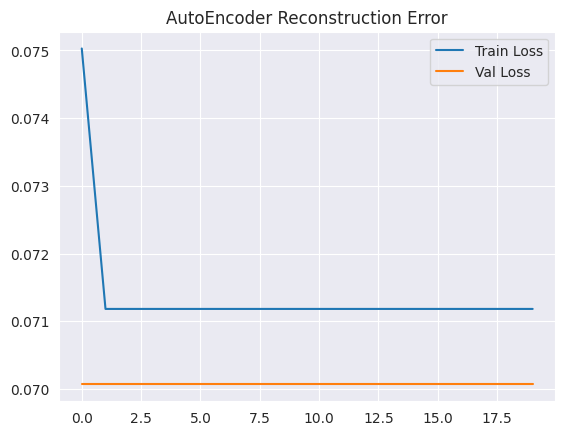

In [35]:
X_train_ae, X_val_ae = train_test_split(X_pixels, test_size=0.1, random_state=42)

print("--- Training AutoEncoder ---")
history = autoencoder.fit(
    X_train_ae, X_train_ae, 
    epochs=20,              
    batch_size=32,
    shuffle=True,
    validation_data=(X_val_ae, X_val_ae),
    verbose=1
)

# Plot loss to see if it learned
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('AutoEncoder Reconstruction Error')
plt.legend()
plt.show()

In [36]:
import numpy as np
import cv2
from tqdm.auto import tqdm

print(f"Current DataFrame size: {len(df_filtered)}")

# 1. Reload Pixels from the CLEAN dataframe only
print("Reloading pixels for the clean dataset...")
X_pixels_clean_list = []

for path in tqdm(df_filtered['image_path']):
    try:
        img = cv2.imread(path)
        img = cv2.resize(img, (128, 128))
        
        # Segment (Optional but recommended to match training)
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, np.array([25, 40, 40]), np.array([85, 255, 255]))
        img = cv2.bitwise_and(img, img, mask=mask)
        
        X_pixels_clean_list.append(img)
    except:
        # This shouldn't happen since we already cleaned the df, but just in case
        X_pixels_clean_list.append(np.zeros((128, 128, 3)))

# Normalize
X_pixels_clean = np.array(X_pixels_clean_list).astype('float32') / 255.0

# 2. Re-extract features
print("Re-extracting AutoEncoder features...")
X_learned_features = encoder.predict(X_pixels_clean, verbose=0)

print(f"New Feature Shape: {X_learned_features.shape}")

# 3. Now the stacking will work!
plant_type_col = df_filtered['plant_type_encoded'].values.reshape(-1, 1)
X_final_ae = np.hstack([X_learned_features, plant_type_col])

print(f"✅ Success! Final X Shape: {X_final_ae.shape}")

Current DataFrame size: 7615
Reloading pixels for the clean dataset...


  0%|          | 0/7615 [00:00<?, ?it/s]

Re-extracting AutoEncoder features...
New Feature Shape: (7615, 128)
✅ Success! Final X Shape: (7615, 129)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

print("--- 1. Setting up Variables & Encoders ---")

X_ae_raw = X_final_ae

label_encoder = LabelEncoder()
y_raw_labels = label_encoder.fit_transform(df_filtered['label'])

print(f"X shape: {X_ae_raw.shape}")
print(f"y shape: {y_raw_labels.shape}")

df_temp_all = pd.DataFrame({'label': label_encoder.classes_})
df_temp_all[['plant', 'status']] = df_temp_all['label'].str.split('__', n=1, expand=True)

plant_encoder_multi = LabelEncoder()
plant_encoder_multi.fit(df_temp_all['plant'])

status_encoder_multi = LabelEncoder()
status_encoder_multi.fit(df_temp_all['status'])

print("Encoders ready.")


print("\n--- 2. Splitting Data (Stratified) ---")

X_train_raw, X_test, y_train_raw, y_test_raw = train_test_split(
    X_ae_raw, 
    y_raw_labels, 
    test_size=0.25, 
    random_state=42, 
    stratify=y_raw_labels
)

print(f"Train Shape (Original): {X_train_raw.shape}")
print(f"Test Shape (Original):  {X_test.shape}")


print("\n--- 3. Applying SMOTE (Training Data ONLY) ---")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_raw, y_train_raw)

print(f"Train Shape (After SMOTE): {X_train_resampled.shape}")


print("\n--- 4. Reconstructing Multi-Output Targets ---")

def decode_labels(y_single_integers, le, le_plant, le_status):
    y_strings = le.inverse_transform(y_single_integers)
    df_temp = pd.DataFrame({'label': y_strings})
    df_temp[['plant', 'status']] = df_temp['label'].str.split('__', n=1, expand=True)
    y_plant = le_plant.transform(df_temp['plant'])
    y_status = le_status.transform(df_temp['status'])
    return np.stack([y_plant, y_status], axis=1)

y_train_multi = decode_labels(y_train_resampled, label_encoder, plant_encoder_multi, status_encoder_multi)
y_test_multi = decode_labels(y_test_raw, label_encoder, plant_encoder_multi, status_encoder_multi)


print("\n--- 5. Training Random Forest ---")

rf_ae = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_ae.fit(X_train_resampled, y_train_multi)

print("--- Results: RF + AutoEncoder (Correct Split) ---")

y_pred_test = rf_ae.predict(X_test)

evaluate_multi_output(y_test_multi, y_pred_test, "RF + AE (Split First)")


--- 1. Setting up Variables & Encoders ---
X shape: (7615, 129)
y shape: (7615,)
Encoders ready.

--- 2. Splitting Data (Stratified) ---
Train Shape (Original): (5711, 129)
Test Shape (Original):  (1904, 129)

--- 3. Applying SMOTE (Training Data ONLY) ---
Train Shape (After SMOTE): (37050, 129)

--- 4. Reconstructing Multi-Output Targets ---

--- 5. Training Random Forest ---
--- Results: RF + AutoEncoder (Correct Split) ---

--- EVALUATION: RF + AE (Split First) ---

--- Target 1: Plant Type ---
Accuracy: 0.9407
              precision    recall  f1-score   support

   ash_gourd       0.96      0.95      0.95       129
bitter_gourd       0.96      0.99      0.97       475
bottle_gourd       0.93      0.89      0.91       349
    cucumber       0.98      0.96      0.97       351
    eggplant       0.75      0.95      0.84       122
 ridge_gourd       0.91      0.86      0.88        83
 snake_gourd       0.85      0.79      0.82        63
      tomato       0.99      0.95      0.97    

In [38]:
y_pred_test = rf_ae.predict(X_train_resampled)
evaluate_multi_output(y_train_multi, y_pred_test, "RF + AE (Split First)")


--- EVALUATION: RF + AE (Split First) ---

--- Target 1: Plant Type ---
Accuracy: 1.0000
              precision    recall  f1-score   support

   ash_gourd       1.00      1.00      1.00      3800
bitter_gourd       1.00      1.00      1.00      5700
bottle_gourd       1.00      1.00      1.00      5700
    cucumber       1.00      1.00      1.00      2850
    eggplant       1.00      1.00      1.00      6650
 ridge_gourd       1.00      1.00      1.00      3800
 snake_gourd       1.00      1.00      1.00      3800
      tomato       1.00      1.00      1.00      4750

    accuracy                           1.00     37050
   macro avg       1.00      1.00      1.00     37050
weighted avg       1.00      1.00      1.00     37050


--- Target 2: Status (Disease/Deficiency) ---
Accuracy: 0.9999
Macro F1 (most important): 0.9999
              precision    recall  f1-score   support

          DM       1.00      1.00      1.00      1900
          EB       1.00      1.00      1.00       95